Part 1 – **Data Cleaning**

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
import category_encoders as ce

In [3]:
df = pd.read_csv("Downloads/bi.csv", encoding = "cp1256")
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


1 - Check dataset structure

In [5]:
df.shape

(77, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


Question: Which columns should be categorical and which should be numerical?

In [8]:
Categorical_cols = df.select_dtypes(include=["object" , "category"]).columns.tolist()
Numerical_cols = df.select_dtypes(include=["int64" , "float64"]).columns.tolist()

print(f"Categorical columns are : {Categorical_cols} \nNumerical columns are : {Numerical_cols}")

Categorical columns are : ['fNAME', 'lNAME', 'gender', 'country', 'residence', 'prevEducation'] 
Numerical columns are : ['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB']


2 - Detect inconsistent categories

In [10]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [11]:
df['gender'] = df['gender'].str.lower() 
df['gender'] = df['gender'].replace(['female','f'],'F')
df['gender'] = df['gender'].replace(['male','m'],'M')
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [13]:
df['country'] = df['country'].replace('norway' , 'Norway')
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [14]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [15]:
df['prevEducation'] = df['prevEducation'].replace(['diploma','DIPLOMA','Diplomaaa'] , 'Diploma')
df['prevEducation'] = df['prevEducation'].replace('HighSchool' , 'High School')
df['prevEducation'] = df['prevEducation'].replace('Barrrchelors' , 'Bachelors')
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

3 - Handle duplicates

In [17]:
df.duplicated().sum()

0

What inconsistencies you found and how you fixed them ?

1 - Gender column

Issue: Values appeared in mixed formats like "Male", "male", "M", and "Female", "female", "F".

Fix: Converted all values to lowercase using .str.lower(), then standardized using .replace() to keep only "M" and "F".

2 - Country column

Issue: Country names had inconsistent cases ("norway", "Norway").

Fix: Standardized using .replace() to unify values "norway" → "Norway" .

3 - prevEducation column

Issue: typos and inconsistent formats such as "Barrrchelors" vs "Bachelor", "HighSchool" vs "High School", and ["diploma", "DIPLOMA", "Diplomaaa"] vs "Diploma".

Fix: Corrected misspelled entries manually using .replace().

- Duplicates

No rows were completely duplicated.

Part 2 – **Missing Data**

1 - Identify missing values

In [21]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

Question: Which columns are most affected by missing values?

-- Python column have 2 missing values 

2 - Impute missing values

Option 1: Fill with Mean

In [26]:
df_mean = df.copy()
df_mean["Python"].fillna(df_mean["Python"].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23692\915564648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean["Python"].fillna(df_mean["Python"].mean(), inplace=True)


In [27]:
df_mean.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.000000,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.000000,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.000000,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,75.853333,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.000000,80


Option 2: Fill with Median

In [29]:
df_median = df.copy()
df_median["Python"].fillna(df_median["Python"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23692\2503032827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median["Python"].fillna(df_median["Python"].median(), inplace=True)


In [30]:
df_median.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80


**Mean** : sensitive to outliers.

**Median** : Not sensitive to outliers, So this is the best solution.

In [32]:
df["Python"].fillna(df["Python"].median(), inplace=True)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23692\3976076892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Python"].fillna(df["Python"].median(), inplace=True)


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80


How missing values were imputed and why ?

- Numerical Column: Python (2 missing values)

- Median Imputation: Missing values in the Python column were filled with the median.

Reason: The median is more robust in the presence of outliers because it is not affected by extreme values. 

- Mean Imputation (for comparison): Alternatively, the mean was also tested.

Reason: The mean preserves the overall trend of the data, but it can be heavily influenced by outliers, which may lead to biased results.


Part 3 – **Outliers**

1 - Detect outliers

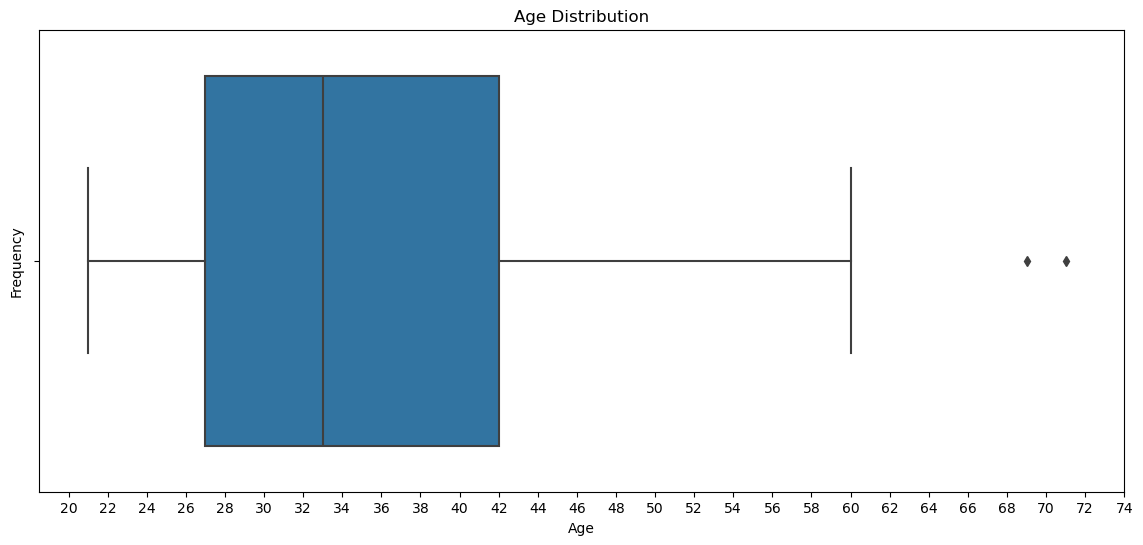

In [36]:
# Seaborn
plt.figure(figsize=(14,6))
sns.boxplot(data = df , x = 'Age')
plt.xticks([i for i in range(20,75,2)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

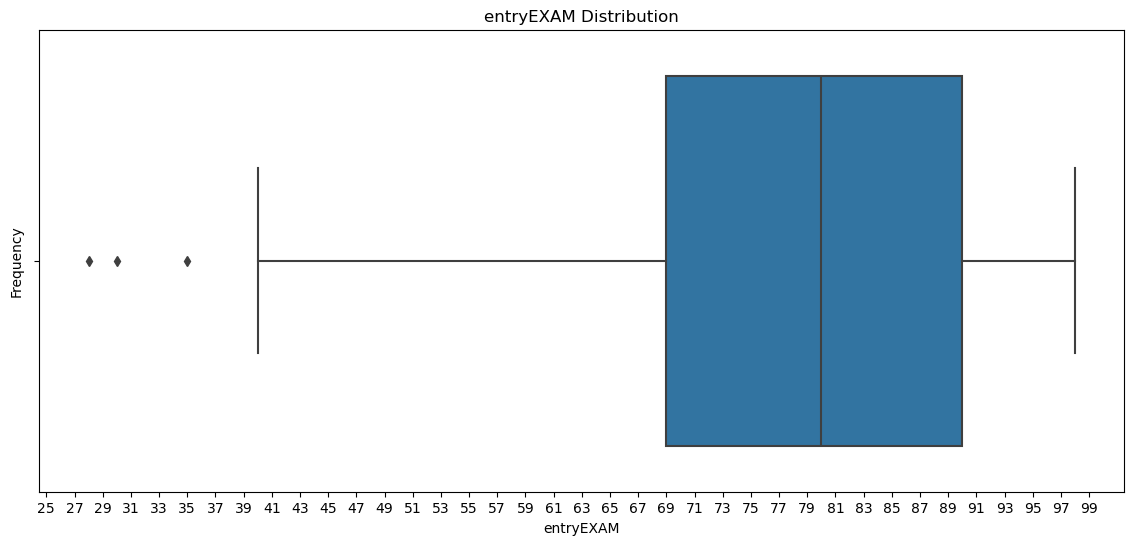

In [37]:
# Seaborn
plt.figure(figsize=(14,6))
sns.boxplot(data = df , x = 'entryEXAM')
plt.xticks([i for i in range(25,100,2)])
plt.title('entryEXAM Distribution')
plt.xlabel('entryEXAM')
plt.ylabel('Frequency')
plt.show()

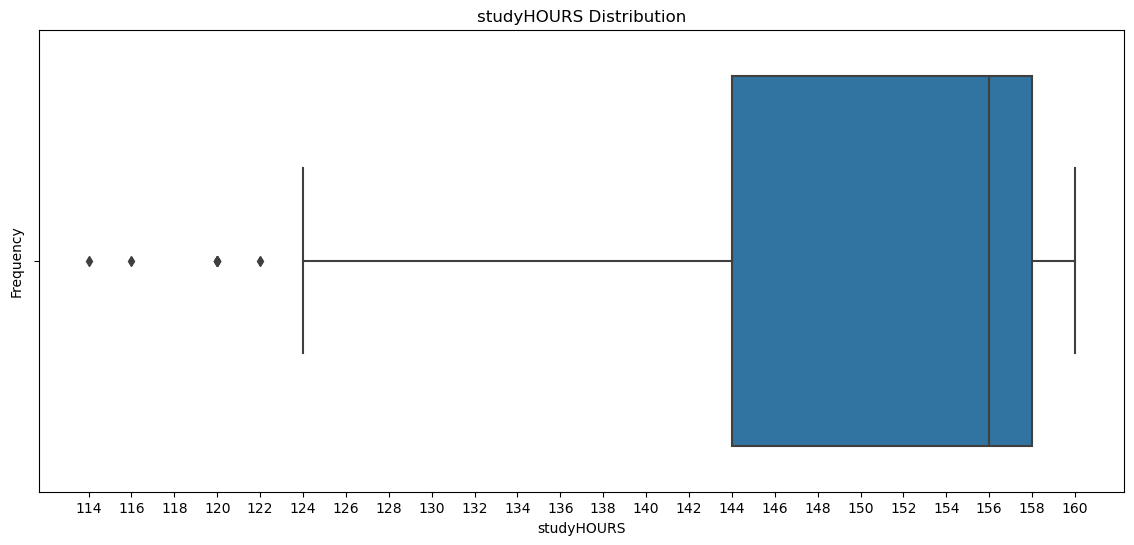

In [38]:
# Seaborn
plt.figure(figsize=(14,6))
sns.boxplot(data = df , x = 'studyHOURS')
plt.xticks([i for i in range(114,162,2)])
plt.title('studyHOURS Distribution')
plt.xlabel('studyHOURS')
plt.ylabel('Frequency')
plt.show()

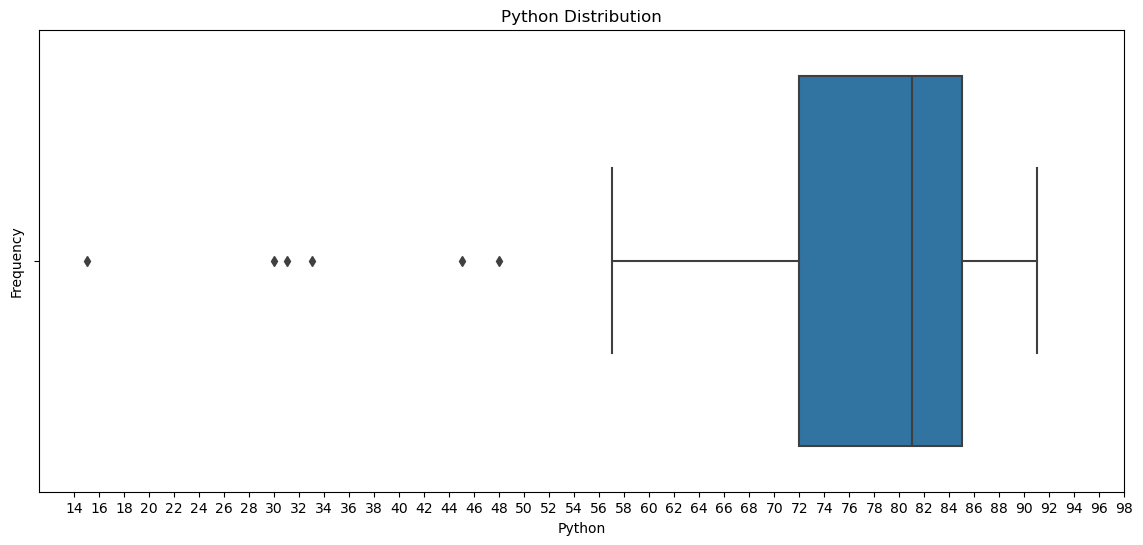

In [39]:
# Seaborn
plt.figure(figsize=(14,6))
sns.boxplot(data = df , x = 'Python')
plt.xticks([i for i in range(14,100,2)])
plt.title('Python Distribution')
plt.xlabel('Python')
plt.ylabel('Frequency')
plt.show()

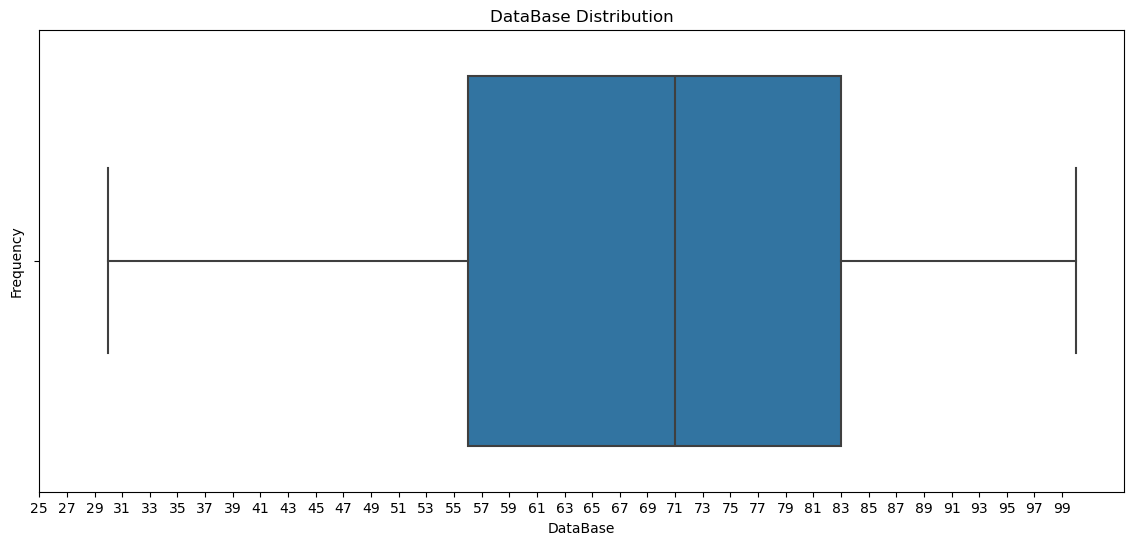

In [40]:
# Seaborn
plt.figure(figsize=(14,6))
sns.boxplot(data = df , x = 'DB')
plt.xticks([i for i in range(25,100,2)])
plt.title('DataBase Distribution')
plt.xlabel('DataBase')
plt.ylabel('Frequency')
plt.show()

Question: Which values in studyHOURS, Python, or DB look unrealistic?
- Nothing , The values are real.

In [42]:
Q1 = df["Python"].quantile(0.25)
Q3 = df["Python"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 : {Q1} , Q3 : {Q3} , IQR : {IQR} , lower_bound : {lower_bound} , upper_bound : {upper_bound}")

Q1 : 72.0 , Q3 : 85.0 , IQR : 13.0 , lower_bound : 52.5 , upper_bound : 104.5


In [43]:
df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
32,Perry,Rّnning,71,F,Norway,Private,30,Doctorate,120,31.0,42
55,Chinedu,Okafor,69,M,Nigeria,Private,94,Doctorate,160,87.0,88


How outliers were detected and treated ?

- Detection methods used :

Outliers were detected using Boxplots (sns.boxplot) for the columns Age, entryEXAM, Python, DB, and studyHOURS.

-- Python Column : 

- Detection:

The boxplot showed several unusually low values: 15, 30, 31, 33, 45, and 48 ,they might represent very weak performance. 

-- DB , studyHOURS , entryEXAM , Age Columns : 

- Detection:

The boxplot showed several realistic values.
  
- Treatment:

I treated them as normal values.

Part 4 – **Feature Engineering**

1 - Create a new feature

In [47]:
df['Programming Average'] = (df['Python'] + df['DB']) / 2
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50,62.0
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44,62.5
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80,85.5


2 - Create a binary feature

In [49]:
df['isAdult'] = (df['Age'] >= 25).astype(int)
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0,1
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5,1
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50,62.0,1
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44,62.5,0
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80,85.5,0


3 - Transform studyHOURS into categories (Low / Medium / High).

In [51]:
df['studyHOURS_Cag'] = pd.cut(df['studyHOURS'] , labels = ['Low' , 'Medium' , 'High'] , bins = [0,120,150,165])
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,studyHOURS_Cag
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55,57.0,1,High
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75,67.5,1,Medium
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50,62.0,1,Medium
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44,62.5,0,Low
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80,85.5,0,Medium


Part 5 – **Feature Scaling**

1 - Detect Numeric Columns

In [54]:
Numerical_cols = df.select_dtypes(include=["int64" , "float64"]).columns.tolist()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

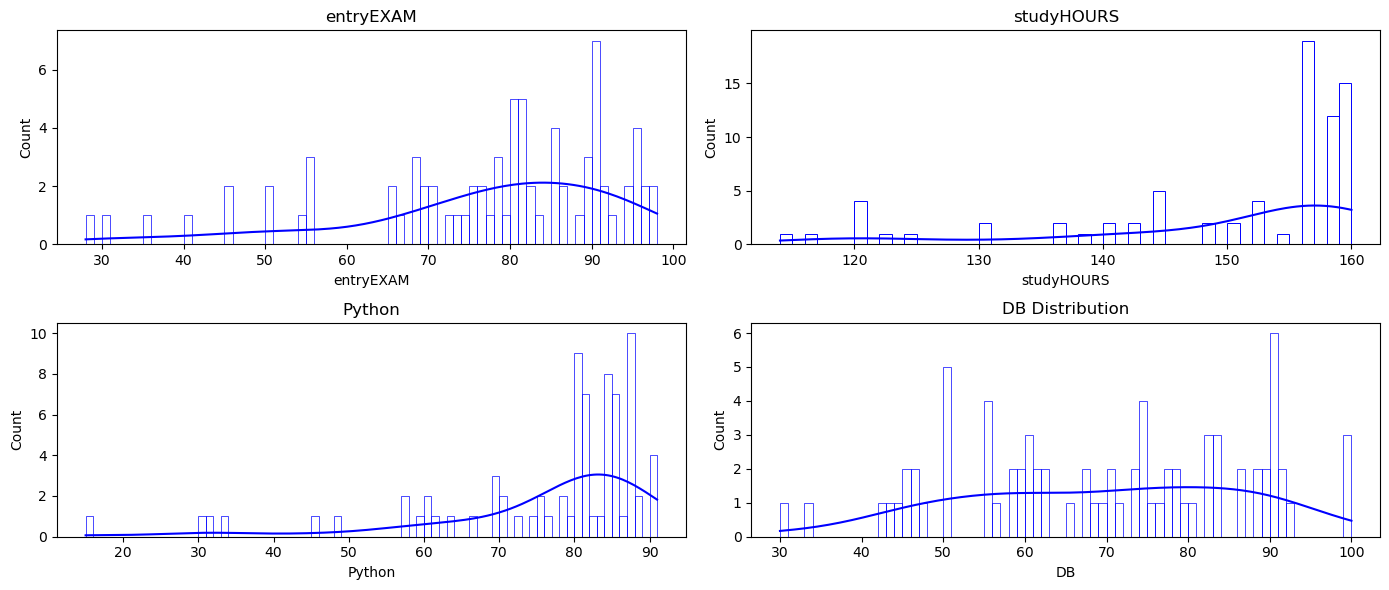

In [55]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.histplot(df['entryEXAM'] , bins = 70 , edgecolor = 'green' , color = 'blue', fill = False , kde = True)
plt.title('entryEXAM')
plt.xlabel('entryEXAM')

plt.subplot(2,2,2)
sns.histplot(df['studyHOURS'] , bins = 46 , edgecolor = 'green' , color = 'blue', fill = False , kde = True)
plt.title('studyHOURS')
plt.xlabel('studyHOURS')

plt.subplot(2,2,3)
sns.histplot(df['Python'] , bins = 76 , edgecolor = 'green' , color = 'blue', fill = False , kde = True)
plt.title('Python')
plt.xlabel('Python')

plt.subplot(2,2,4)
sns.histplot(df['DB'] , bins = 70 , edgecolor = 'green' , color = 'blue', fill = False , kde = True)
plt.title('DB Distribution')
plt.xlabel('DB')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


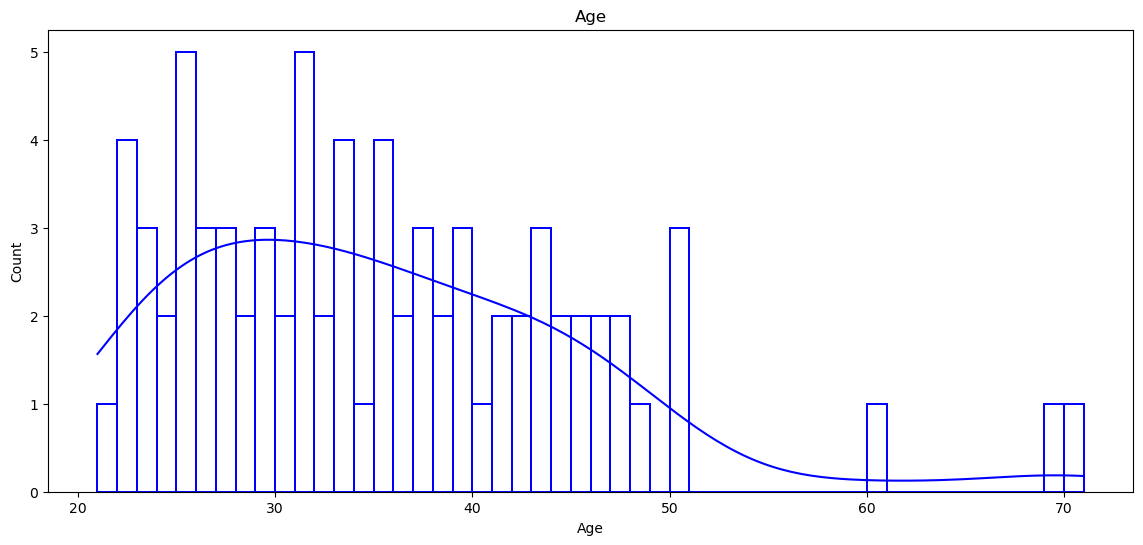

In [56]:
# Seaborn
plt.figure(figsize=(14,6))
sns.histplot(df['Age'] , bins = 50 , edgecolor = 'green' , color = 'blue', fill = False , kde = True)
plt.title('Age')
plt.xlabel('Age')
plt.show()

2 - Apply Scaling

In [58]:
Scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[Numerical_cols] = Scaler.fit_transform(df[Numerical_cols])

df_scaled.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,studyHOURS_Cag
0,Christina,Binger,0.46,F,Norway,Private,0.628571,Masters,0.956522,0.578947,0.357143,0.414634,1,High
1,Alex,Walekhwa,0.78,M,Kenya,Private,0.728571,Diploma,0.782609,0.592105,0.642857,0.585366,1,Medium
2,Philip,Leo,0.08,M,Uganda,Sognsvann,0.385714,High School,0.347826,0.776316,0.285714,0.495935,1,Medium
3,Shoni,Hlongwane,0.02,F,Rsa,Sognsvann,0.171429,High School,0.130435,0.868421,0.200000,0.504065,0,Low
4,Maria,Kedibone,0.04,F,South Africa,Sognsvann,0.528571,High School,0.173913,1.000000,0.714286,0.878049,0,Medium


Part 6 – **Encoding Categorical Data**

1 - Detect Categorical Columns

In [61]:
Categorical_cols = df_scaled.select_dtypes(include=["object" , "category"]).columns.tolist()

2 - Handle Encoding

In [63]:
# Handle gender column by One Hot Encoding
df_scaled = pd.get_dummies(df_scaled , columns = ['gender'] , drop_first = True)

In [64]:
# Handle country , residence columns by Binary Encoding
encoder = ce.BinaryEncoder(cols = ['country' , 'residence'])
df_scaled = encoder.fit_transform(df_scaled)

In [65]:
# Handle prevEducation , studyHOURS_Cag columns by Label Encoding
label = LabelEncoder()
df_scaled['prevEducation'] = label.fit_transform(df_scaled['prevEducation'])
df_scaled['studyHOURS_Cag'] = label.fit_transform(df_scaled['studyHOURS_Cag'])

In [66]:
df_scaled.head()

,fNAME,lNAME,Age,country_0,country_1,country_2,country_3,residence_0,residence_1,residence_2,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming Average,isAdult,studyHOURS_Cag,gender_M
0,Christina,Binger,0.46,0,0,0,1,0,0,1,0.628571,4,0.956522,0.578947,0.357143,0.414634,1,0,False
1,Alex,Walekhwa,0.78,0,0,1,0,0,0,1,0.728571,1,0.782609,0.592105,0.642857,0.585366,1,2,True
2,Philip,Leo,0.08,0,0,1,1,0,1,0,0.385714,3,0.347826,0.776316,0.285714,0.495935,1,2,True
3,Shoni,Hlongwane,0.02,0,1,0,0,0,1,0,0.171429,3,0.130435,0.868421,0.200000,0.504065,0,1,False
4,Maria,Kedibone,0.04,0,1,0,1,0,1,0,0.528571,3,0.173913,1.000000,0.714286,0.878049,0,2,False


New Dataset

cleaned version of the dataset

In [69]:
# Save the cleaned dataset to a new CSV file
df_scaled.to_csv("cleaned_students.csv", index=False)   